In [1]:
from variations import *
import variations
reload(variations)

<module 'variations' from 'variations.pyc'>

In [2]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to ROOTaaS 6.06/06
purities:
[ 0.2080955   0.33947809  0.48394409  0.509     ]
[ 0.03765166  0.04768804  0.04896864  0.048     ]
[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]
['../InputData/pT_Rebin_4/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_4/pPb_SE_L0_Correlation_GMB_Ratio.root']
purities:
[ 0.2080955   0.33947809  0.48394409  0.509     ]
[ 0.03765166  0.04768804  0.04896864  0.048     ]
[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]
['../InputData/pT_Rebin_4/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_4/pPb_SE_L0_Correlation_GMB_Ratio.root']


In [3]:
Ldphi = [0.39269908169872414, 0.5890486225480862, 0.7853981633974483, 0.9817477042468103, 1.1780972450961724, 1.3744467859455345, 1.5707963267948966, 1.7671458676442586, 1.9634954084936207, 2.1598449493429825, 2.356194490192345, 2.552544031041707, 2.748893571891069, 2.945243112740431]
print(Ldphi[6:])
print(len(Ldphi))

[1.5707963267948966, 1.7671458676442586, 1.9634954084936207, 2.1598449493429825, 2.356194490192345, 2.552544031041707, 2.748893571891069, 2.945243112740431]
14


In [4]:
sdphi = [0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]
print(sdphi[3:])

[1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069]


In [5]:
Corrs = ROOT_to_nparray()
print(len(Corrs["p-Pb_CSR"][2][2]))

7


In [6]:
Show_Plots = False
if (Ped_Sub_First):
    if (Show_Plots):
        Plot_UB()
        Plot_Sub_UB_Overlay(Corrs)
    Correlated_Subtraction(Corrs)
    
else:
    Correlated_Subtraction(Corrs)
    if (Show_Plots):
        Plot_UB_Subtraction(Corrs)
    Ped_Sub_After_Cs(Corrs)

$C_S = \frac{C_{SR} - (1-p) C_{BR}}{p}$

In [7]:
#Plot_pp_pPb_Cs(Corrs)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [8]:
Frags = Get_Fragmentation(Corrs)

## p-Pb / pp

In [9]:
reload(functions_fragmentation)
from functions_fragmentation import *
print(Frags["pp_FF"][2])

[  1.12726789e+01   3.94671596e+00   2.62355108e+00   6.05305531e-01
   2.37546869e-01   6.90686513e-02   9.39311534e-04]


**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [10]:
Combined_Frags = Average_FF(Frags)

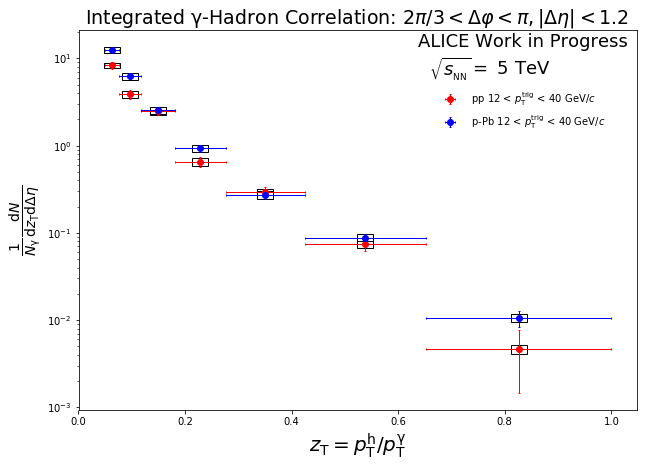

                    pp Central Values:
[  8.30852499e+00   3.87417663e+00   2.46686111e+00   6.55670492e-01
   2.92332799e-01   7.37656348e-02   4.62147228e-03]

                    pp Stat. Uncertainty:
[ 0.66530034  0.41092458  0.21475572  0.08842757  0.03950086  0.01130433
  0.00315325]

                    p-Pb Central Values:
[  1.25896878e+01   6.19712153e+00   2.53070797e+00   9.26847398e-01
   2.71836565e-01   8.82139951e-02   1.05763124e-02]

                    p-Pb Stat. Uncertainty:
[ 0.69315937  0.4500814   0.21805699  0.0864613   0.02940825  0.00953184
  0.0022528 ]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 8\%-68\% & 6\%-21\% \\
\hline
Purity & 5\%-10\% & 6\%-9\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


In [11]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

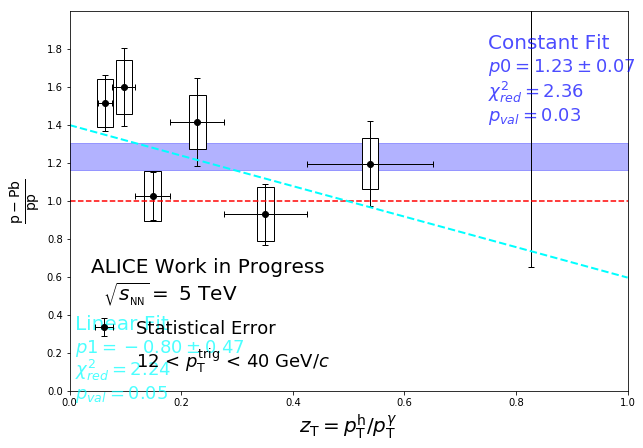

                Central Values:
[ 1.51527351  1.59959705  1.02588182  1.41358717  0.92988733  1.19586845
  2.28851581]

                Ratio Uncertainty from Purity:
[ 0.06479904  0.08783791  0.11080045  0.10202245  0.12739948  0.10247789
  0.09436745]

                Ratio Uncertainty from Single Track Efficiency:
[ 0.10714602  0.11310859  0.0725408   0.09995571  0.06575296  0.08456067
  0.1618225 ]

                Full Systematic Uncertainty:
[ 0.12521655  0.14320982  0.13243454  0.1428276   0.14336694  0.13286167
  0.18732789]

****************************************
Minimizer is Linear
Chi2                      =       14.167
NDf                       =            6
p0                        =      1.23247   +/-   0.0689126   

****************************************
Minimizer is Linear
Chi2                      =      11.2224
NDf                       =            5
p0                        =      1.39796   +/-   0.118532    
p1                        =    -0.801461   +/-   

In [12]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

## Compare Trigger pT Bins

In [13]:
reload(functions_correlations)
from functions_correlations import *

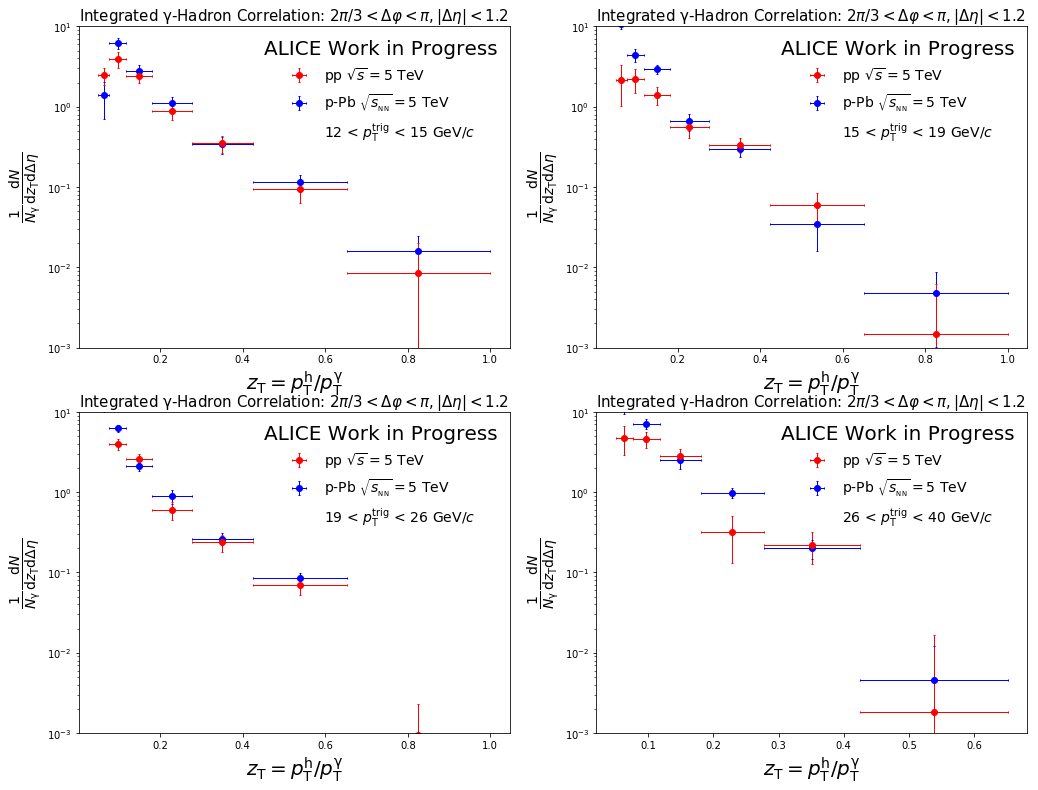

In [14]:
Plot_FF(Frags)

In [15]:
reload(functions_fragmentation)
from functions_fragmentation import *

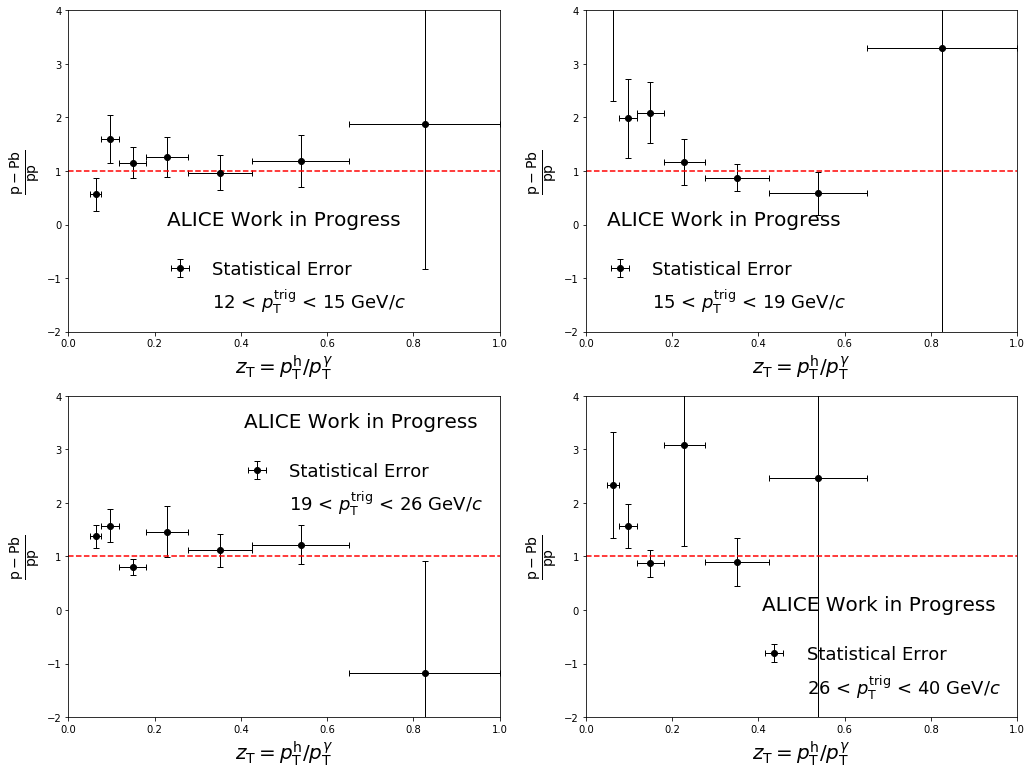

In [16]:
FF_Ratio(Frags)

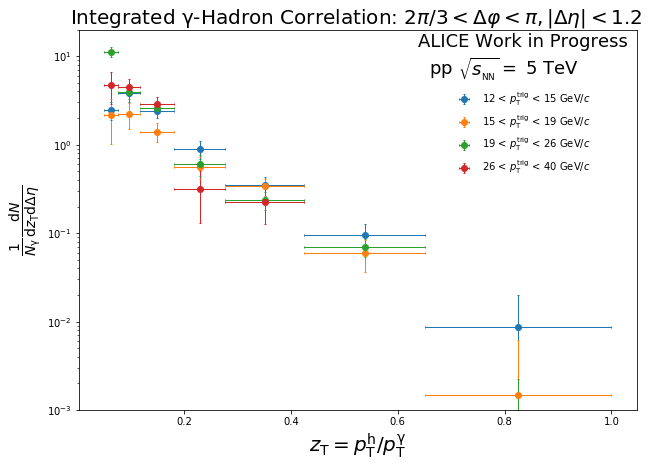

                             PROTON-PROTON:
Central Values
[[  2.46285423e+00   3.87947839e+00   2.43243908e+00   8.87681467e-01
    3.49123759e-01   9.56504624e-02   8.58910459e-03]
 [  2.14670938e+00   2.21275731e+00   1.40808355e+00   5.62657271e-01
    3.38332805e-01   6.02388402e-02   1.47454744e-03]
 [  1.12726789e+01   3.94671596e+00   2.62355108e+00   6.05305531e-01
    2.37546869e-01   6.90686513e-02   9.39311534e-04]
 [  4.78262072e+00   4.54008985e+00   2.85558975e+00   3.19283493e-01
    2.22822734e-01   1.85765838e-03              nan]]
Statistical Errors (Relative)
[[ 0.23314596  0.22267106  0.17776691  0.22441076  0.24725058  0.32938227
   1.35099221]
 [ 0.5226189   0.3252358   0.24341061  0.27804726  0.21695202  0.40021039
   3.228737  ]
 [ 0.12400334  0.15941171  0.12611116  0.26235793  0.23430517  0.22986567
   1.41739582]
 [ 0.39337975  0.22481157  0.19933315  0.59205412  0.42641997  7.96146603
          nan]]
Relative Uncertainty from Purity
[[  5.24978248e-01   8.2

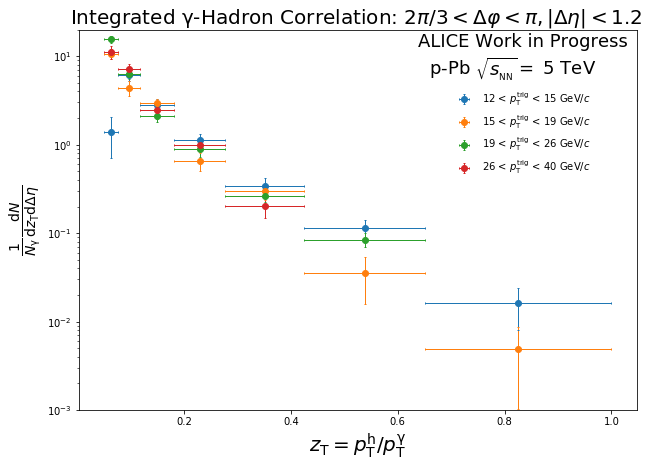

                              PROTON-LEAD:
Central Values
[[  1.38433952e+00   6.19579886e+00   2.81452359e+00   1.12093750e+00
    3.38790157e-01   1.13869644e-01   1.61503979e-02]
 [  1.06811225e+01   4.38660900e+00   2.94290851e+00   6.58374735e-01
    2.95808587e-01   3.51412595e-02   4.85281216e-03]
 [  1.55037147e+01   6.22041843e+00   2.11007252e+00   8.86284545e-01
    2.64489839e-01   8.44731129e-02  -1.10888880e-03]
 [  1.11381449e+01   7.12261360e+00   2.48185030e+00   9.86019085e-01
    2.00501731e-01   4.57966192e-03              nan]]
Statistical Errors (Relative)
[[ 0.48608728  0.16376928  0.17498894  0.19138577  0.23161568  0.24677159
   0.49960328]
 [ 0.12406322  0.1890027   0.12690278  0.23473447  0.18895291  0.54965464
   0.78984412]
 [ 0.09776453  0.10932311  0.14050715  0.18862164  0.1581584   0.18007746
  -1.06877348]
 [ 0.16013725  0.14466913  0.21729573  0.14958678  0.26420214  1.68587664
          nan]]
Relative Uncertainty from Purity
[[  2.95083699e-01   1.32

In [17]:
Overlay_pT_FF(Frags)

## Compare Track Cuts

In [18]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

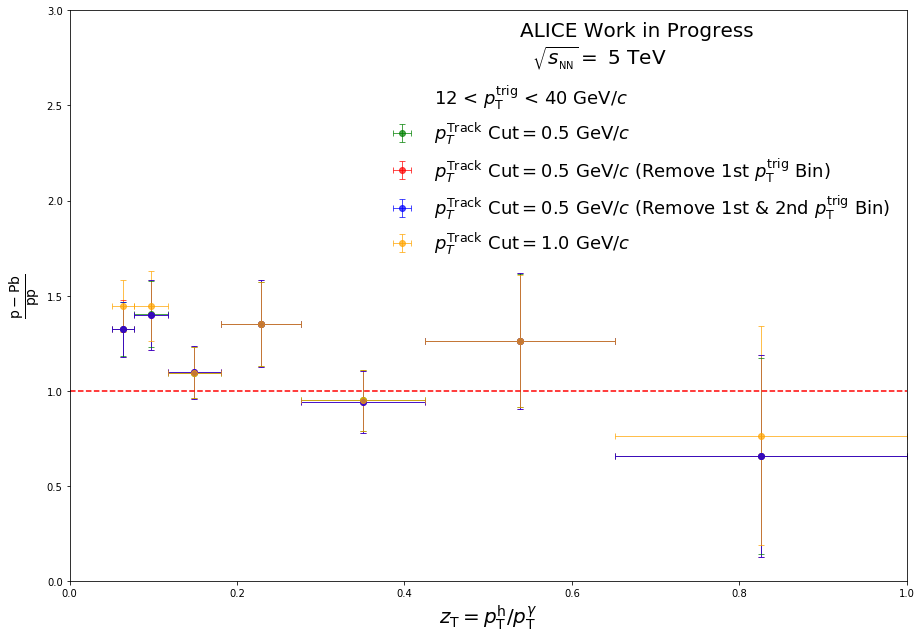

                Central Values:
[ 1.4457051   1.4481745   1.09574319  1.3500227   0.94988511  1.26222862
  0.76439433]

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      6.55659
NDf                       =            6
p0                        =      1.18867   +/-   0.0714348   

****************************************
Minimizer is Linear
Chi2                      =      6.59049
NDf                       =            6
p0                        =      1.19041   +/-   0.070857    

****************************************
Minimizer is Linear
Chi2                      =      9.02064
NDf                       =            6
p0                        =      1.23515   +/-   0.0685692   


In [19]:
strings = ["05zT","05zT_3bins","05zT_2bins","1zT"]
string_descriptions = ["$p_{T}^\mathrm{Track}\ \mathrm{Cut} = 0.5\ \mathrm{GeV}/c$",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st & 2nd $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 1.0\ \mathrm{GeV}/c$"]
colors = ["green","red","blue","orange"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

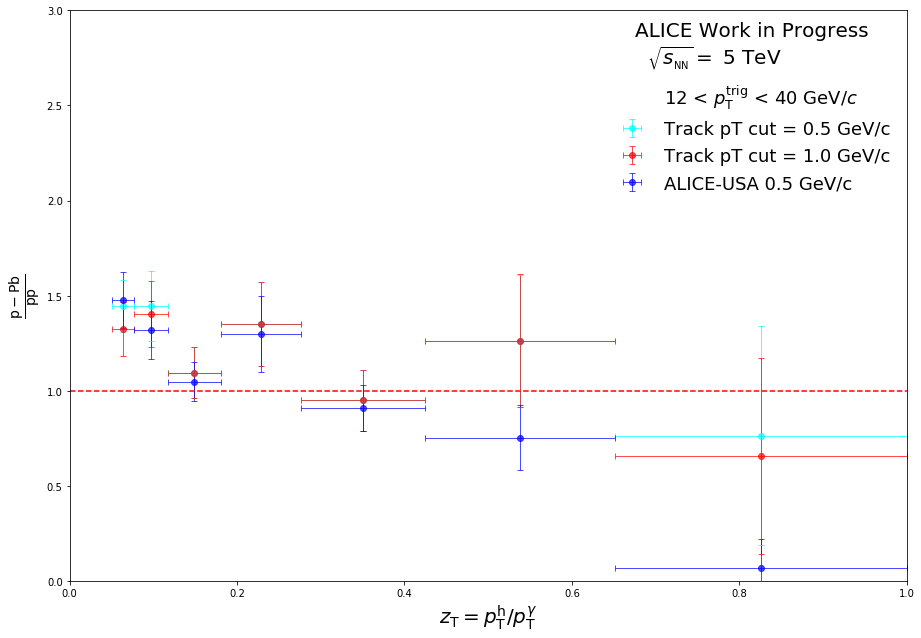

                Central Values:
[ 1.47546927  1.31963154  1.04878313  1.29933689  0.91089677  0.75447711
  0.07122347]

****************************************
Minimizer is Linear
Chi2                      =      9.02064
NDf                       =            6
p0                        =      1.23515   +/-   0.0685692   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      57.1819
NDf                       =            6
p0                        =     0.979532   +/-   0.053191    


In [20]:
strings = ["1zT","05zT","05zT_working_old"]
string_descriptions = ["Track pT cut = 0.5 GeV/c", "Track pT cut = 1.0 GeV/c","ALICE-USA 0.5 GeV/c"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

## Compare Trigger Photon pT Binning (3,4,& 5 Bins)

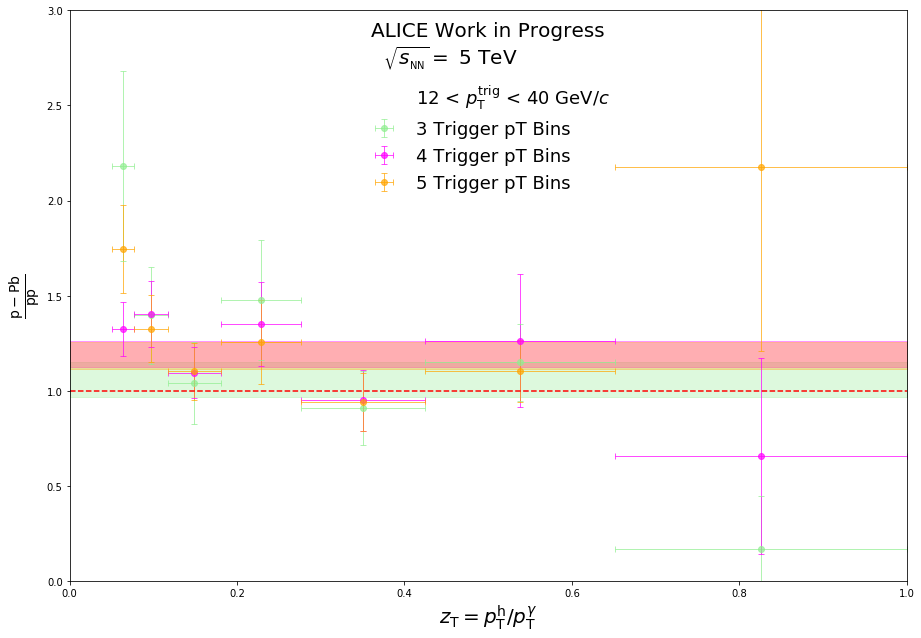

                Central Values:
[ 1.74759929  1.32684886  1.10166038  1.25803898  0.94240937  1.10477787
  2.1777261 ]

****************************************
Minimizer is Linear
Chi2                      =      19.7879
NDf                       =            6
p0                        =      1.05868   +/-   0.093368    

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      10.8027
NDf                       =            6
p0                        =      1.18779   +/-   0.0715211   


In [21]:
strings = ["pT_Rebin_3","05zT","pT_Rebin_5"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

## Compare ZT Binning (6,7, & 8)

In [22]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


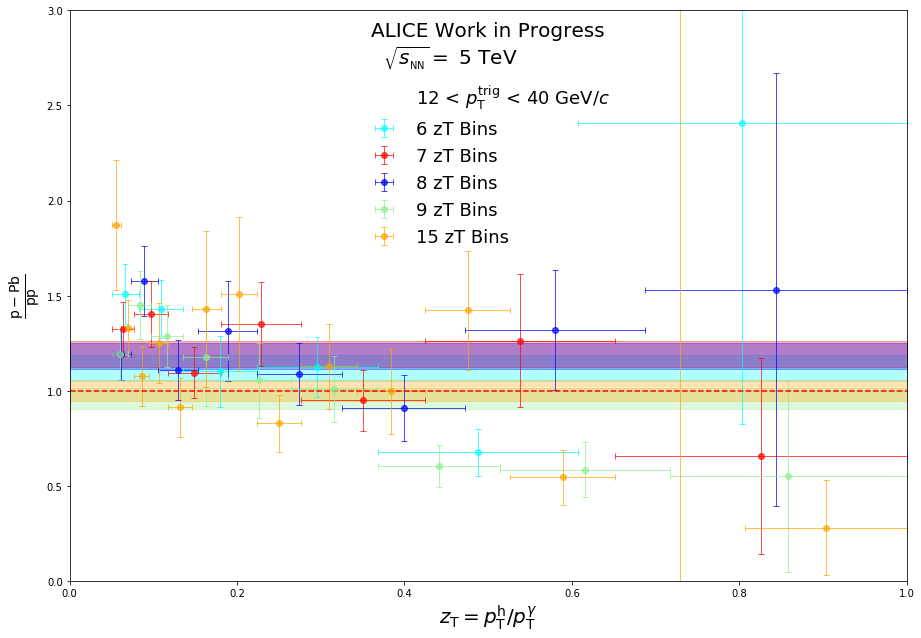

                Central Values:
[ 1.87060069  1.33279792  1.07594827  1.25077422  0.91343145  1.42914142
  1.50908939  0.82971572  1.12926386  0.9983693   1.42230144  0.54562724
  8.00428232  0.28118115]

****************************************
Minimizer is Linear
Chi2                      =      23.6267
NDf                       =            5
p0                        =      1.12038   +/-   0.0677459   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   

****************************************
Minimizer is Linear
Chi2                      =      8.12662
NDf                       =            7
p0                        =      1.18291   +/-   0.0673123   

****************************************
Minimizer is Linear
Chi2                      =       33.127
NDf                       =            8
p0                        =     0.

In [23]:
strings = ["zT_Rebin_6","05zT","zT_Rebin_8","zT_Rebin_9","zT_Rebin_15"]
string_descriptions = ["6 zT Bins", "7 zT Bins", "8 zT Bins","9 zT Bins","15 zT Bins"]
colors = ["cyan","red","blue","lightgreen","orange"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[ 0.06335319  0.09719185  0.14910469  0.22874559  0.35092488  0.53836348
  0.82591817]


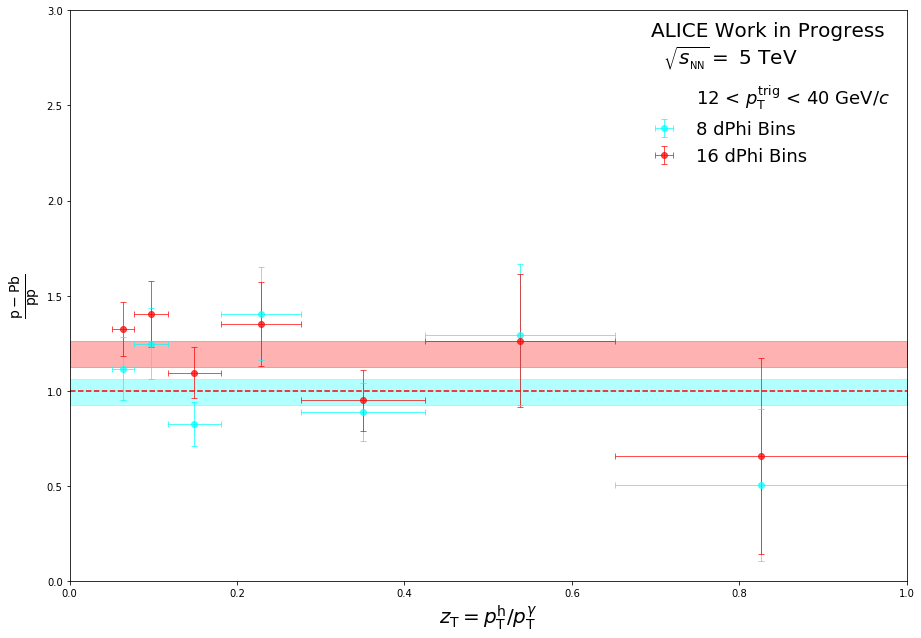

                Central Values:
[ 1.32366377  1.40359966  1.09574319  1.35002169  0.94964235  1.26255443
  0.65928593]

****************************************
Minimizer is Linear
Chi2                      =      10.0649
NDf                       =            6
p0                        =     0.994347   +/-   0.0679332   

****************************************
Minimizer is Linear
Chi2                      =      6.77918
NDf                       =            6
p0                        =      1.19365   +/-   0.0688147   


In [24]:
strings = ["dPhi_Rebin_16","05zT"]
string_descriptions = ["8 dPhi Bins", "16 dPhi Bins"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)